In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mtimg

In [10]:
dir = os.getcwd()
images_dir = os.path.join(dir, 'yalefaces')
files = os.listdir(images_dir)
images = [];
vec = [];
for image in files:
    path = os.path.join(images_dir, image)
    img = mtimg.imread(path)
    if img is not None:
        images.append(img)
        row, col = img.shape;
        img_vec = img.reshape(row * col)
        img_norm = img_vec / np.linalg.norm(img_vec)
        vec.append(img_norm)
print(len(images))
print(len(vec))

166
166


In [11]:
def generateRandomHashVectors(no_of_vectors, size_of_vector):
    random_vec = []
    for i in range(no_of_vectors):
        v = np.random.uniform(-1, 1, size_of_vector)
        v_norm = v / np.linalg.norm(v)
        random_vec.append(v_norm)
    return random_vec

In [12]:
def LSH(random_vectors, data_point):
    hash_code = []
    for i in range(len(random_vectors)):
        if np.dot(data_point, random_vectors[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code

In [13]:
random_vectors = generateRandomHashVectors(10, len(vec[0]))
print(len(random_vectors))

10


In [14]:
LSH(random_vectors, vec[0])

['1', '0', '0', '0', '0', '1', '1', '0', '0', '1']

In [15]:
img_dict = {}
for i in range(len(vec)):
    hash_code = LSH(random_vectors, vec[i])
    hash_string = ''.join(hash_code)
    if hash_string not in img_dict.keys():
        img_dict[hash_string] = []
    img_dict[hash_string].append(i)

In [16]:
hashed_imgs = pd.DataFrame(img_dict.items(), columns=['hash_code', 'image_indices'])
hashed_imgs.head(6)

,hash_code,image_indices
0,1000011001,"[0, 10, 20, 27, 38, 62, 78, 85, 111, 121, 126,..."
1,1001011001,"[1, 2, 3, 6, 8, 11, 14, 16, 19, 22, 23, 24, 25..."
2,1000011000,"[4, 29, 93, 97, 160]"
3,1000010001,"[5, 36]"
4,1001011000,"[7, 9, 15, 21, 34, 35, 37, 39, 46, 50, 53, 54,..."
5,0001011000,[12]


Enter image path to search or Enter 'exit' to exit the searchsubject01.gif
/Users/kodandaramadurgaraopoluri/Desktop/IITG-ASS/Hashing/subject01.gif


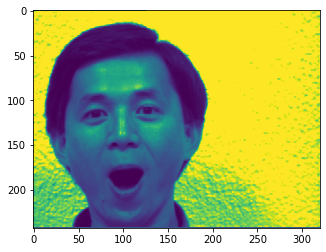

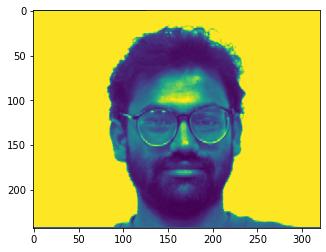

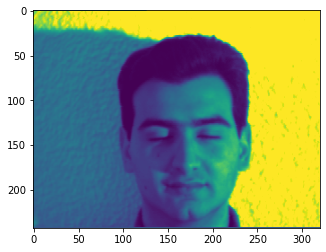

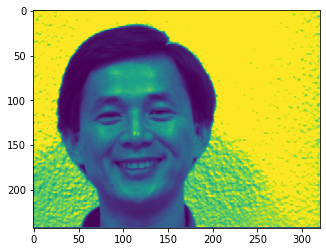

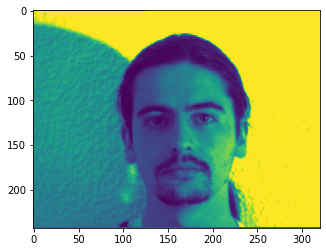

In [ ]:
while True:
    query = input("Enter image path to search or Enter 'exit' to exit the search")
    if query.lower() == 'exit':
        break
    path = os.path.join(dir, query)
    print(path)
    img = mtimg.imread(path)
    if img is not None:
        row, col = img.shape;
        img_vec = img.reshape(row * col)
        img_norm = img_vec / np.linalg.norm(img_vec)
        hash_code = LSH(random_vectors, img_norm)
        hash_string = ''.join(hash_code)
        if hash_string in img_dict.keys():
            images_indices = img_dict[hash_string]
            # to enable top k results, for now showing top 5
            count = 0
            for index in images_indices:
                if count == 5:
                    break
                plt.imshow(images[index]) 
                plt.show()
                count += 1
        else:
            print('No results found')